# Телеком

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь
 планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о
 некоторых клиентах, информацию об их тарифах и договорах.

# Исследовательский анализ данных

Импорт библиотек

In [1]:
!pip install seaborn


You should consider upgrading via the 'd:\my_files\univer\2_курс\матмод\labs\final\scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
import lightgbm as lgb

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score


In [3]:
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

Получение данных

In [4]:
contract = pd.read_csv('../data/contract.csv', index_col = 'customerID')
internet = pd.read_csv('../data/internet.csv', index_col = 'customerID')
personal = pd.read_csv('../data/personal.csv', index_col = 'customerID')
phone = pd.read_csv('../data/phone.csv', index_col = 'customerID')

In [5]:
contract

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...
6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45


Информация о столбцах:

* BeginDate - Дата начала использования
* EndDate	Type - Дата окончания
* PaperlessBilling - Получает электронный счет
* PaymentMethod - Способ оплаты
* MonthlyCharges - Ежемесячная плата
* TotalCharges - Общая сумма платы

In [6]:
internet


,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
customerID,,,,,,,
7590-VHVEG,DSL,No,Yes,No,No,No,No
5575-GNVDE,DSL,Yes,No,Yes,No,No,No
3668-QPYBK,DSL,Yes,Yes,No,No,No,No
7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
9237-HQITU,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...
6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
4801-JZAZL,DSL,Yes,No,No,No,No,No


Информация о столбцах:

* InternetService - Телефонная линия (DSL, от англ. digital subscriber line, «цифровая абонентская линия») или
 оптоволоконный кабель (Fiber optic)
* OnlineSecurity - Блокировка небезопасных сайтов
* OnlineBackup - Облачное хранилище файлов для резервного копирования данных
* DeviceProtection - Антивирус
* TechSupport - Выделенная линия технической поддержки
* StreamingTV - Стриминговое телевидение
* StreamingMovies - Каталог фильмов

In [7]:
personal

,gender,SeniorCitizen,Partner,Dependents
customerID,,,,
7590-VHVEG,Female,0,Yes,No
5575-GNVDE,Male,0,No,No
3668-QPYBK,Male,0,No,No
7795-CFOCW,Male,0,No,No
9237-HQITU,Female,0,No,No
...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes
2234-XADUH,Female,0,Yes,Yes
4801-JZAZL,Female,0,Yes,Yes


Информация о столбцах:

* Gender - пол
* SeniorCitizen - пенсионеров в семье
* Partner - партнер
* Dependents - иждивенец

In [8]:
phone

,MultipleLines
customerID,
5575-GNVDE,No
3668-QPYBK,No
9237-HQITU,No
9305-CDSKC,Yes
1452-KIOVK,Yes
...,...
2569-WGERO,No
6840-RESVB,Yes
2234-XADUH,Yes


Информация о столбцах:

* MultipleLines - подключение телефонного аппарата к нескольким линиям одновременно

### contract
Посмотрим внимательно на столбцы **contract**

In [9]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BeginDate         7043 non-null   object 
 1   EndDate           7043 non-null   object 
 2   Type              7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(6)
memory usage: 440.2+ KB


Нужно привести данные к соответсвующим типам (даты - datetime, общая сумма - float)

In [10]:
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], errors='coerce')
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'], format='%Y-%m-%d', errors='ignore')
contract['EndDate'] = pd.to_datetime(contract['EndDate'], format='%Y-%m-%d', errors='coerce')

In [11]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7043 non-null   datetime64[ns]
 1   EndDate           1869 non-null   datetime64[ns]
 2   Type              7043 non-null   object        
 3   PaperlessBilling  7043 non-null   object        
 4   PaymentMethod     7043 non-null   object        
 5   MonthlyCharges    7043 non-null   float64       
 6   TotalCharges      7032 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(3)
memory usage: 440.2+ KB


Есть пропуски в одном из самых важных столбцов *TotalCharges*. Так как пропуски составляют менее 1%, то строки с ними
 можно удалить, чтобы не портить данные своими предположениями.

In [12]:

contract = contract.dropna(subset=['TotalCharges'])
contract.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7032 non-null   datetime64[ns]
 1   EndDate           1869 non-null   datetime64[ns]
 2   Type              7032 non-null   object        
 3   PaperlessBilling  7032 non-null   object        
 4   PaymentMethod     7032 non-null   object        
 5   MonthlyCharges    7032 non-null   float64       
 6   TotalCharges      7032 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(3)
memory usage: 439.5+ KB


In [13]:
personal = personal[personal.index.isin(contract.index)]
internet = internet[internet.index.isin(contract.index)]
phone = phone[phone.index.isin(contract.index)]

In [14]:
contract

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,
7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85
5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.50
3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15
7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75
9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...
6840-RESVB,2018-02-01,NaT,One year,Yes,Mailed check,84.80,1990.50
2234-XADUH,2014-02-01,NaT,One year,Yes,Credit card (automatic),103.20,7362.90
4801-JZAZL,2019-03-01,NaT,Month-to-month,Yes,Electronic check,29.60,346.45


Изучим внимательно *MonthlyCharges* и *TotalCharges*

In [15]:
contract.describe()

,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000
mean,64.798208,2283.300441
std,30.085974,2266.771362
min,18.250000,18.800000
25%,35.587500,401.450000
50%,70.350000,1397.475000
75%,89.862500,3794.737500
max,118.750000,8684.800000


<AxesSubplot:>

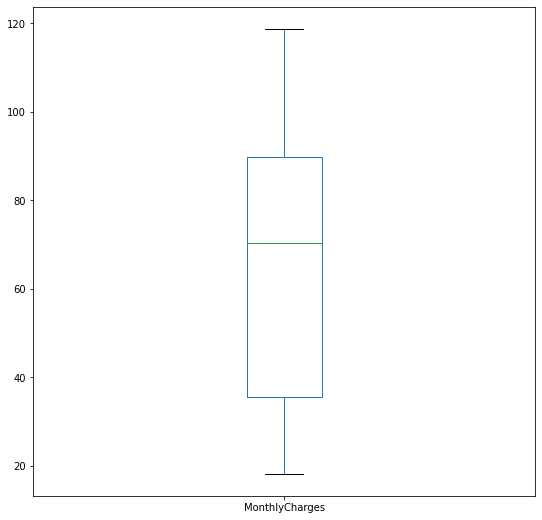

In [16]:
contract['MonthlyCharges'].plot.box(figsize= (9, 9))

<AxesSubplot:>

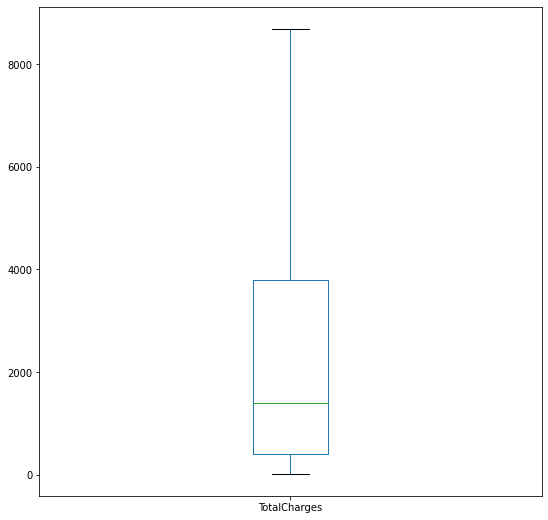

In [17]:
contract['TotalCharges'].plot.box(figsize= (9, 9))

Можно увидеть, что данные в ежемесячной оплате будут скошены влево, а в общей сумме - вправо

Создадим отдельный столбец, который будет отвечать за то, ушел ли пользователь.

In [18]:
contract['isEnd'] = contract['EndDate'].notna()
contract['isEnd']

customerID
7590-VHVEG    False
5575-GNVDE    False
3668-QPYBK     True
7795-CFOCW    False
9237-HQITU     True
              ...  
6840-RESVB    False
2234-XADUH    False
4801-JZAZL    False
8361-LTMKD     True
3186-AJIEK    False
Name: isEnd, Length: 7032, dtype: bool

Посмотрим на данные относительно созданного столбца.

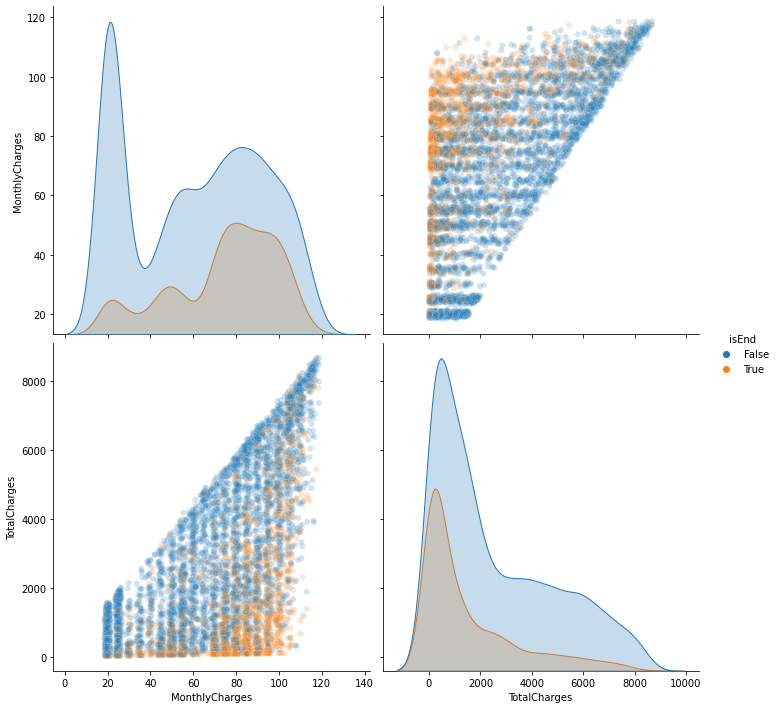

In [19]:
sns.pairplot(contract, hue="isEnd", plot_kws = {'alpha': 0.2}, height= 5)

Можем увидеть, что у большей части ушедших пользователей была довольно высокая помесячная оплата. Также в помесячной
 оплате можно заметить 3 отчетливо выраженные группы.

### internet

In [20]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5512 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   5512 non-null   object
 1   OnlineSecurity    5512 non-null   object
 2   OnlineBackup      5512 non-null   object
 3   DeviceProtection  5512 non-null   object
 4   TechSupport       5512 non-null   object
 5   StreamingTV       5512 non-null   object
 6   StreamingMovies   5512 non-null   object
dtypes: object(7)
memory usage: 344.5+ KB


In [21]:
internet.describe()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5512,5512,5512,5512,5512,5512,5512
unique,2,2,2,2,2,2,2
top,Fiber optic,No,No,No,No,No,No
freq,3096,3497,3087,3094,3472,2809,2781


5,5 тыс пользователей пользуются услугами предоставления интернет соединения у нашей компании. Каждой услугой пользуется
 большая часть пользователей. Самая популярная - Online Security, а наименее - Streaming Movies.

### personal

In [22]:
personal.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7032 non-null   object
 1   SeniorCitizen  7032 non-null   int64 
 2   Partner        7032 non-null   object
 3   Dependents     7032 non-null   object
dtypes: int64(1), object(3)
memory usage: 274.7+ KB


In [23]:
personal.describe()

,SeniorCitizen
count,7032.000000
mean,0.162400
std,0.368844
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Лишь малая часть пользователей имеет пожилых членов семьи. А также можем заметить, что максимальное количесвто равно 1.
Скорее всего это не количественный, а категориальный признак.

In [24]:
personal.drop(['SeniorCitizen'], axis=1).describe()

,gender,Partner,Dependents
count,7032,7032,7032
unique,2,2,2
top,Male,No,No
freq,3549,3639,4933


Распределение женщин и мужчин одинаковое, а вот количество семей с детьми преобладает в выборке.

### phone

In [25]:
phone.describe()

,MultipleLines
count,6352
unique,2
top,No
freq,3385


Услугами стационарной телефонии пользуется гораздо больше человек чем интернетом, что уже может дать некий портрет о
 пользователе компании.

Посмотрим еще на некоторые выборки.

Ушедшие клиенты:

In [26]:
arr = (contract['EndDate'] - contract['BeginDate']) / np.timedelta64(1, 'D')
arr.describe()

count    1869.000000
mean      547.352060
std       594.389607
min        30.000000
25%        61.000000
50%       304.000000
75%       883.000000
max      2191.000000
dtype: float64

<AxesSubplot:ylabel='Count'>

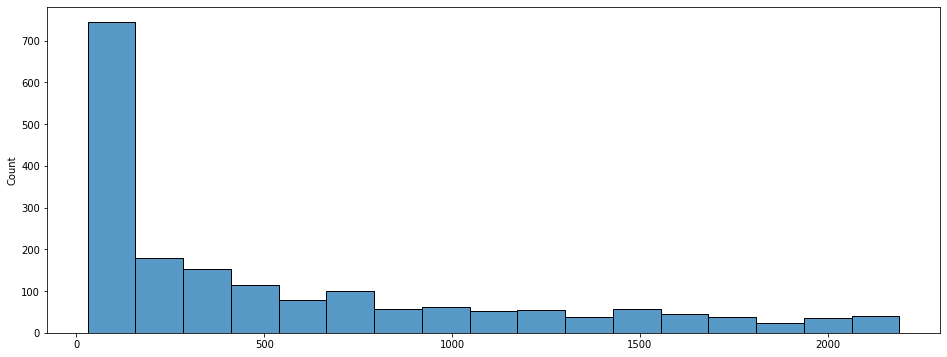

In [27]:
plt.figure(figsize=(16, 6))
sns.histplot(arr)

Ушедшие люди пользовались услугами компании разное время, но большая часть пользователей уходит на первых 3 месяцах.

## План действий (задача классификации):

1. Объединить таблицы по id пользователя
2. Провести подготовку данных для машинного обучения (кодирование, масштабировние...)
3. Обучить различные модели (подбирая лучшие гиперпараметры)
4. Проверить лучшие модели на валидационной выборке (в качестве метрики возьмем auc-roc)

# Подготовка данных к обучению

Соединим таблицы в одну.

In [28]:
df = contract.join(internet)
df = df.join(personal)
df = df.join(phone)

Также создадим новый столбец, сколько интернет услуг подключено у пользователей.

In [29]:
for i in df.index:
    s = 0
    if df.loc[i, 'OnlineSecurity'] == 'Yes':
        s += 1
    if df.loc[i, 'OnlineBackup'] == 'Yes':
        s += 1
    if df.loc[i, 'DeviceProtection'] == 'Yes':
        s += 1
    if df.loc[i, 'TechSupport'] == 'Yes':
        s += 1
    if df.loc[i, 'StreamingTV'] == 'Yes':
        s += 1
    if df.loc[i, 'StreamingMovies'] == 'Yes':
        s += 1
    df.loc[i, 'ServicesNum'] = s

Выделим все категориальные столбцы в один массив.

In [30]:
cat_features = ['PaperlessBilling', 'PaymentMethod', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies', 'gender', 'SeniorCitizen',
                'Partner',	'Dependents', 'MultipleLines', 'Type']

Наличие столбца *EndDate* напрямую показывает, ушел клиент или нет. Поэтому его мы удалим, а оставим столбец сколько
 человек был в компании на момент, когда нужно принимать решение, что он собирается уйти (то есть для тех, кто ушел это
  будет дата ухода - дата начала подписки, а для тех, кто все еще в компании - это текущая дата(1 февраля 2020) - дата
   подписки)

In [31]:
df['EndDate'] = df['EndDate'].fillna(pd.to_datetime('2020-02-01', format='%Y-%m-%d'))
df['Days'] = (df['EndDate'] - df['BeginDate']) / np.timedelta64(1, 'D')

df = df.drop(['BeginDate', 'EndDate'], axis = 1)

Посмотрим коэффициенты корреляции количественных признаков и удалим те, где коэффициент будет больше 0.8

In [32]:
df.corr()

,MonthlyCharges,TotalCharges,isEnd,SeniorCitizen,ServicesNum,Days
MonthlyCharges,1.000000,0.651065,0.192858,0.219874,0.724768,0.246715
TotalCharges,0.651065,1.000000,-0.199484,0.102411,0.746101,0.825811
isEnd,0.192858,-0.199484,1.000000,0.150541,-0.087882,-0.354496
SeniorCitizen,0.219874,0.102411,0.150541,1.000000,0.067527,0.015630
ServicesNum,0.724768,0.746101,-0.087882,0.067527,1.000000,0.495247
Days,0.246715,0.825811,-0.354496,0.015630,0.495247,1.000000


У нас есть проблема мультиколлинеарности, удалим столбец 'TotalCharges'.

In [33]:
df = df.drop('TotalCharges', axis = 1)

Значений внутри категориальных признаков не так уж и много, поэтому мы можем применить прямое кодирование, и, чтобы не
попасть в дамми-ловушку, мы применим **pd.get_dummies** с *drop_first=True*. Но перед этим заменим все Nan на
 "Not subscribe", чтобы не плодить новых столбцов с Nan в каждом признаке.

In [34]:
df = df.fillna("Not subscribe")

encode_df = pd.get_dummies(df.reindex(columns=cat_features), drop_first=True)
df_coded = df.drop(cat_features, axis=1).join(encode_df)
df_coded

,MonthlyCharges,isEnd,ServicesNum,Days,SeniorCitizen,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,...,StreamingTV_Yes,StreamingMovies_Not subscribe,StreamingMovies_Yes,gender_Male,Partner_Yes,Dependents_Yes,MultipleLines_Not subscribe,MultipleLines_Yes,Type_One year,Type_Two year
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,29.85,False,1.0,31.0,0,1,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
5575-GNVDE,56.95,False,2.0,1036.0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3668-QPYBK,53.85,True,2.0,61.0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
7795-CFOCW,42.30,False,3.0,1371.0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
9237-HQITU,70.70,True,0.0,61.0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,84.80,False,5.0,730.0,0,1,0,0,1,0,...,1,0,1,1,1,1,0,1,1,0
2234-XADUH,103.20,False,4.0,2191.0,0,1,1,0,0,1,...,1,0,1,0,1,1,0,1,1,0
4801-JZAZL,29.60,False,1.0,337.0,0,1,0,1,0,0,...,0,0,0,0,1,1,1,0,0,0


Разделим данные на тренировочную и тестовую выборки. Так как у нас наблюдается явное преобладание класса клиентов,
 которые остались в компании, то при разделении укажем **startify = df['isEnd']**, чтобы и в тестовой были отрицательные
 значения.

In [35]:
target = df_coded['isEnd']
features = df_coded.drop('isEnd', axis = 1)
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=12345, stratify=df_coded['isEnd'])

Сделаем upsample тренировочной выборки, чтобы модели лучше обучались. Увеличим класс ушедших пользователей в 3 раза.

In [36]:
def upsample(features, target, repeat):
    features_zeros = features[target == False]
    features_ones = features[target == True]
    target_zeros = target[target == False]
    target_ones = target[target == True]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(
    features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

In [37]:
features_train, target_train = upsample(features_train, target_train, 3)

Применим масштабирование признаков для того, чтобы модели не приняли высокие значения за более важные.

In [38]:
scaler = StandardScaler()

scaler.fit(features_train[['MonthlyCharges', 'Days']])
features_train_scaled = scaler.transform(features_train[['MonthlyCharges', 'Days']])
features_test_scaled = scaler.transform(features_test[['MonthlyCharges', 'Days']])

features_train[['MonthlyCharges', 'Days']] = features_train_scaled
features_test[['MonthlyCharges', 'Days']] = features_test_scaled

# Обучение моделей

Везде воспользуемся GridSearchCV для  подбора лучших гиперпараметров и кросс-валидации. В зависимости от сложности
 модели будем указывать cv = 3 или 5.

## Простые модели

### Дерево решений

Также после обучения построим модель и посмотрим на график важности факторов

In [39]:
models_columns = ['model', 'AUC-ROC best cross-val',
                    'accuracy train', 'AUC-ROC train',
                    'accuracy test', 'AUC-ROC test']

models = pd.DataFrame(columns=models_columns)

In [40]:
%%time
#<дерево решений>
tree_parameters = {'criterion' : ['gini', 'entropy'], 'max_depth': range (1,15)}

clf = DecisionTreeClassifier(random_state = 12345)

grid = GridSearchCV(clf, tree_parameters, cv=5, scoring = 'roc_auc')
grid.fit(features_train, target_train)

models = models.append(pd.Series(["DecisionTreeClassifier", grid.best_score_,
                                       accuracy_score(target_train, grid.predict(features_train)),
                                       grid.score(features_train, target_train),
                                       accuracy_score(target_test, grid.predict(features_test)),
                                       grid.score(features_test, target_test)], index=models_columns),
                                   ignore_index=True)
models

Wall time: 2.92 s


,model,AUC-ROC best cross-val,accuracy train,AUC-ROC train,accuracy test,AUC-ROC test
0,DecisionTreeClassifier,0.898453,0.899232,0.969681,0.760523,0.789831


<AxesSubplot:ylabel='feature_importance'>

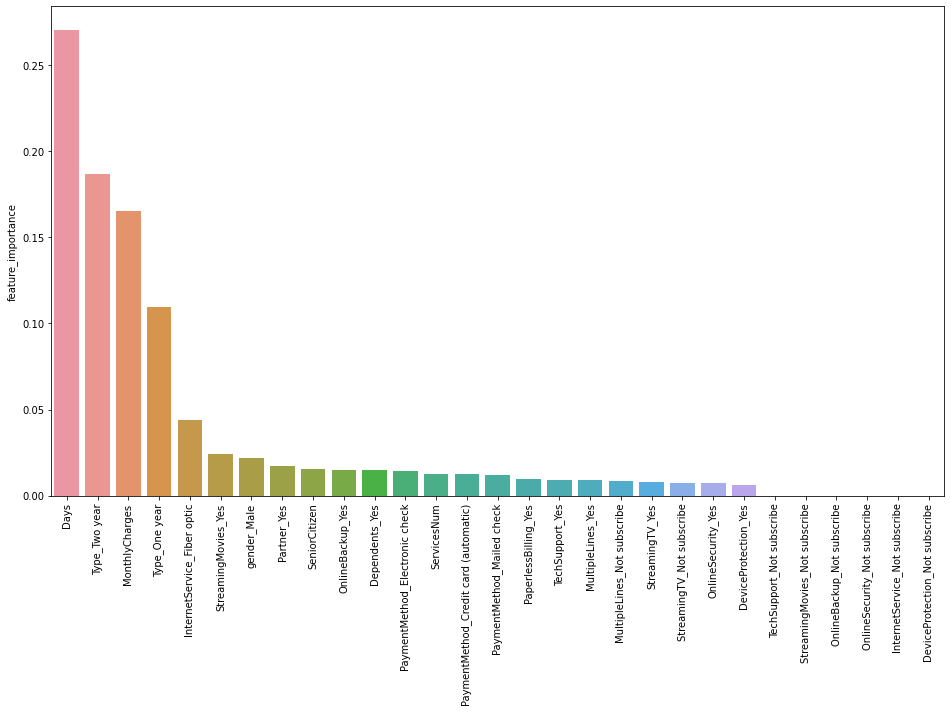

In [41]:
model = DecisionTreeClassifier(criterion='gini', max_depth=14, random_state = 12345)
model.fit(features_train, target_train)

feature_importances=pd.DataFrame({'feature_importance':model.feature_importances_}, index=features_train.columns)
feature_importances = feature_importances.sort_values('feature_importance',ascending=False)
plt.figure(figsize=(16, 9))
plt.xticks(rotation=90, ha='center')
sns.barplot(y = feature_importances['feature_importance'], x = feature_importances.index)

Получается, что от многих столбцов с nan нет никакой пользы. Их можно удалить, чтобы не перезагружать последующие
 модели.

In [42]:
drop_list = ['DeviceProtection_Not subscribe', 'StreamingTV_Not subscribe', 'TechSupport_Not subscribe',
             'OnlineBackup_Not subscribe', 'OnlineSecurity_Not subscribe', 'InternetService_Not subscribe']

features_train = pd.DataFrame(features_train, columns=features.columns)
features_train = features_train.drop(drop_list, axis=1)
features_test = pd.DataFrame(features_test, columns=features.columns)
features_test = features_test.drop(drop_list, axis=1)
features_test

,MonthlyCharges,ServicesNum,Days,SeniorCitizen,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,OnlineSecurity_Yes,...,StreamingTV_Yes,StreamingMovies_Not subscribe,StreamingMovies_Yes,gender_Male,Partner_Yes,Dependents_Yes,MultipleLines_Not subscribe,MultipleLines_Yes,Type_One year,Type_Two year
customerID,,,,,,,,,,,,,,,,,,,,,
9614-RMGHA,0.820883,2.0,1.574541,0,1,0,0,0,1,0,...,1,0,0,1,1,0,0,1,0,0
0661-KQHNK,-1.710631,0.0,-0.895376,0,0,1,0,0,0,0,...,0,1,0,0,1,1,0,0,1,0
9851-KIELU,1.455065,6.0,-0.727504,0,1,0,1,0,1,1,...,1,0,1,1,0,0,0,0,0,0
5777-KJIRB,-0.624703,1.0,0.527407,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
8433-WXGNA,0.259676,1.0,-1.064623,0,1,0,1,0,1,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4140-MUHUG,0.647135,2.0,-1.021967,1,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
9700-ISPUP,-0.094771,3.0,-0.727504,0,1,0,1,0,0,0,...,0,0,1,0,1,1,0,0,0,0
1927-QEWMY,-1.658506,0.0,1.866253,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1


### Случайный лес

In [43]:
%%time
#<случайный лес>
forest_parameters = { 'n_estimators': range (10, 201, 20),
                      'max_depth': range (1, 10),
                      'max_features': ['auto', 'sqrt', 'log2'],
                      'criterion' :['gini', 'entropy']}

clf = RandomForestClassifier(random_state = 12345)

grid = GridSearchCV(clf, forest_parameters, cv=3, scoring = 'roc_auc')
grid.fit(features_train, target_train)

models = models.append(pd.Series(["RandomForestClassifier", grid.best_score_,
                                       accuracy_score(target_train, grid.predict(features_train)),
                                       grid.score(features_train, target_train),
                                       accuracy_score(target_test, grid.predict(features_test)),
                                       grid.score(features_test, target_test)], index=models_columns),
                                   ignore_index=True)
models

Wall time: 6min 55s


,model,AUC-ROC best cross-val,accuracy train,AUC-ROC train,accuracy test,AUC-ROC test
0,DecisionTreeClassifier,0.898453,0.899232,0.969681,0.760523,0.789831
1,RandomForestClassifier,0.898459,0.859000,0.934206,0.763936,0.865023


### Логистическая регрессия

In [44]:
%%time
#<Логистическая регрессия>
linear_parameters = {"C":np.logspace(-3,3,7)}

clf = LogisticRegression(random_state = 12345)

grid = GridSearchCV(clf, linear_parameters, cv=5, scoring = 'roc_auc')
grid.fit(features_train, target_train)

models = models.append(pd.Series(["LogisticRegression", grid.best_score_,
                                       accuracy_score(target_train, grid.predict(features_train)),
                                       grid.score(features_train, target_train),
                                       accuracy_score(target_test, grid.predict(features_test)),
                                       grid.score(features_test, target_test)], index=models_columns),
                                   ignore_index=True)
models

Wall time: 1.57 s


,model,AUC-ROC best cross-val,accuracy train,AUC-ROC train,accuracy test,AUC-ROC test
0,DecisionTreeClassifier,0.898453,0.899232,0.969681,0.760523,0.789831
1,RandomForestClassifier,0.898459,0.859000,0.934206,0.763936,0.865023
2,LogisticRegression,0.842166,0.767145,0.843680,0.745734,0.851558


## Градиентный бустинг
### CatBoostClassifier

In [45]:
%%time

#<CatBoostClassifier>
cat_parameters = {'loss_function': ["Logloss"],
                  'learning_rate': [0.03, 0.1],
                  'depth': [5, 10]}

clf = CatBoostClassifier(logging_level='Silent', random_state=12345)

grid = GridSearchCV(clf, cat_parameters, cv=3, scoring = 'roc_auc')
grid.fit(features_train, target_train, verbose = 10)

models = models.append(pd.Series(["CatBoostClassifier", grid.best_score_,
                                       accuracy_score(target_train, grid.predict(features_train) == 'True'),
                                       grid.score(features_train, target_train),
                                       accuracy_score(target_test, grid.predict(features_test) == 'True'),
                                       grid.score(features_test, target_test)], index=models_columns),
                                   ignore_index=True)
models

Wall time: 2min 3s


,model,AUC-ROC best cross-val,accuracy train,AUC-ROC train,accuracy test,AUC-ROC test
0,DecisionTreeClassifier,0.898453,0.899232,0.969681,0.760523,0.789831
1,RandomForestClassifier,0.898459,0.859000,0.934206,0.763936,0.865023
2,LogisticRegression,0.842166,0.767145,0.843680,0.745734,0.851558
3,CatBoostClassifier,0.974786,0.998143,0.999984,0.837884,0.892396


### LightGBM (~1h 43 min)

In [46]:
%%time
#<LightGBM>
lgb_parametrs = {'n_estimators': [400, 700, 1000],
                 'colsample_bytree': [0.7, 0.8],
                 'max_depth': [15,20,25],
                 'num_leaves': [50, 100, 200],
                 'reg_alpha': [1.1, 1.2, 1.3],
                 'reg_lambda': [1.1, 1.2, 1.3],
                 'min_split_gain': [0.3, 0.4],
                 'subsample': [0.7, 0.8, 0.9],
                 'subsample_freq': [20]}

clf = lgb.LGBMClassifier()

grid = GridSearchCV(clf, lgb_parametrs, cv=5, scoring = 'roc_auc')
grid.fit(features_train, target_train, verbose = 10, categorical_feature='auto')

models = models.append(pd.Series(["LightGBM", grid.best_score_,
                                       accuracy_score(target_train, grid.predict(features_train)),
                                       grid.score(features_train, target_train),
                                       accuracy_score(target_test, grid.predict(features_test)),
                                       grid.score(features_test, target_test)], index=models_columns),
                                   ignore_index=True)
models

Wall time: 1h 56min 23s


,model,AUC-ROC best cross-val,accuracy train,AUC-ROC train,accuracy test,AUC-ROC test
0,DecisionTreeClassifier,0.898453,0.899232,0.969681,0.760523,0.789831
1,RandomForestClassifier,0.898459,0.859000,0.934206,0.763936,0.865023
2,LogisticRegression,0.842166,0.767145,0.843680,0.745734,0.851558
3,CatBoostClassifier,0.974786,0.998143,0.999984,0.837884,0.892396
4,LightGBM,0.949613,0.942189,0.985102,0.843003,0.905680


# Анализ моделей

Лучший результат мы получили roc-auc 0.91 с помощью LGBMClassifier. Значение accuracy на тестовой выборке 0.84.

В целом градиентный бустинг показал себя лучше, чем простые модели.
